## Extracting shallow water nodes from the sea graph

In [1]:
from pygradu import gridify
import shapely.geometry
import pandas as pd
import numpy as np
import importlib

grid = gridify.area_to_grid(side_length=10000)

Original NE: POINT (134 40)
Original SW: POINT (123 32)
Transformed NE: (798015.8738997555, 745576.6479352411)
Transformed SW: (-178108.15703831997, -158644.45983641956)
col_count 97
row_count 90
grid_size 8730


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap
plt.rcParams.update({'font.size': 60})

def visualize_graph(graph, grid):
    nodes = graph.original.drop_duplicates().values
    lats = []
    lons = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats.append(latlon[0])
        lons.append(latlon[1])

    f = plt.figure(figsize=[50,50])
    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()

    plt.plot(lons, lats, 'o', c='red', alpha=1, markersize=4)

    plt.show()
    
def visualize_two_graphs(graph_bottom, graph_top, grid):
    
    
    nodes = graph_bottom.original.drop_duplicates().values
    lats = []
    lons = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats.append(latlon[0])
        lons.append(latlon[1])


    nodes = graph_top.original.drop_duplicates().values
    lats2 = []
    lons2 = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats2.append(latlon[0])
        lons2.append(latlon[1])

    f = plt.figure(figsize=[50,50])
    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()

    plt.plot(lons, lats, 'o', c='blue', alpha=1, markersize=4)
    plt.plot(lons2, lats2, 'o', c='red', alpha=1, markersize=4)

    plt.show()

In [ ]:
#### Graph built using the examples in 1. Sea Modelling.ipyng

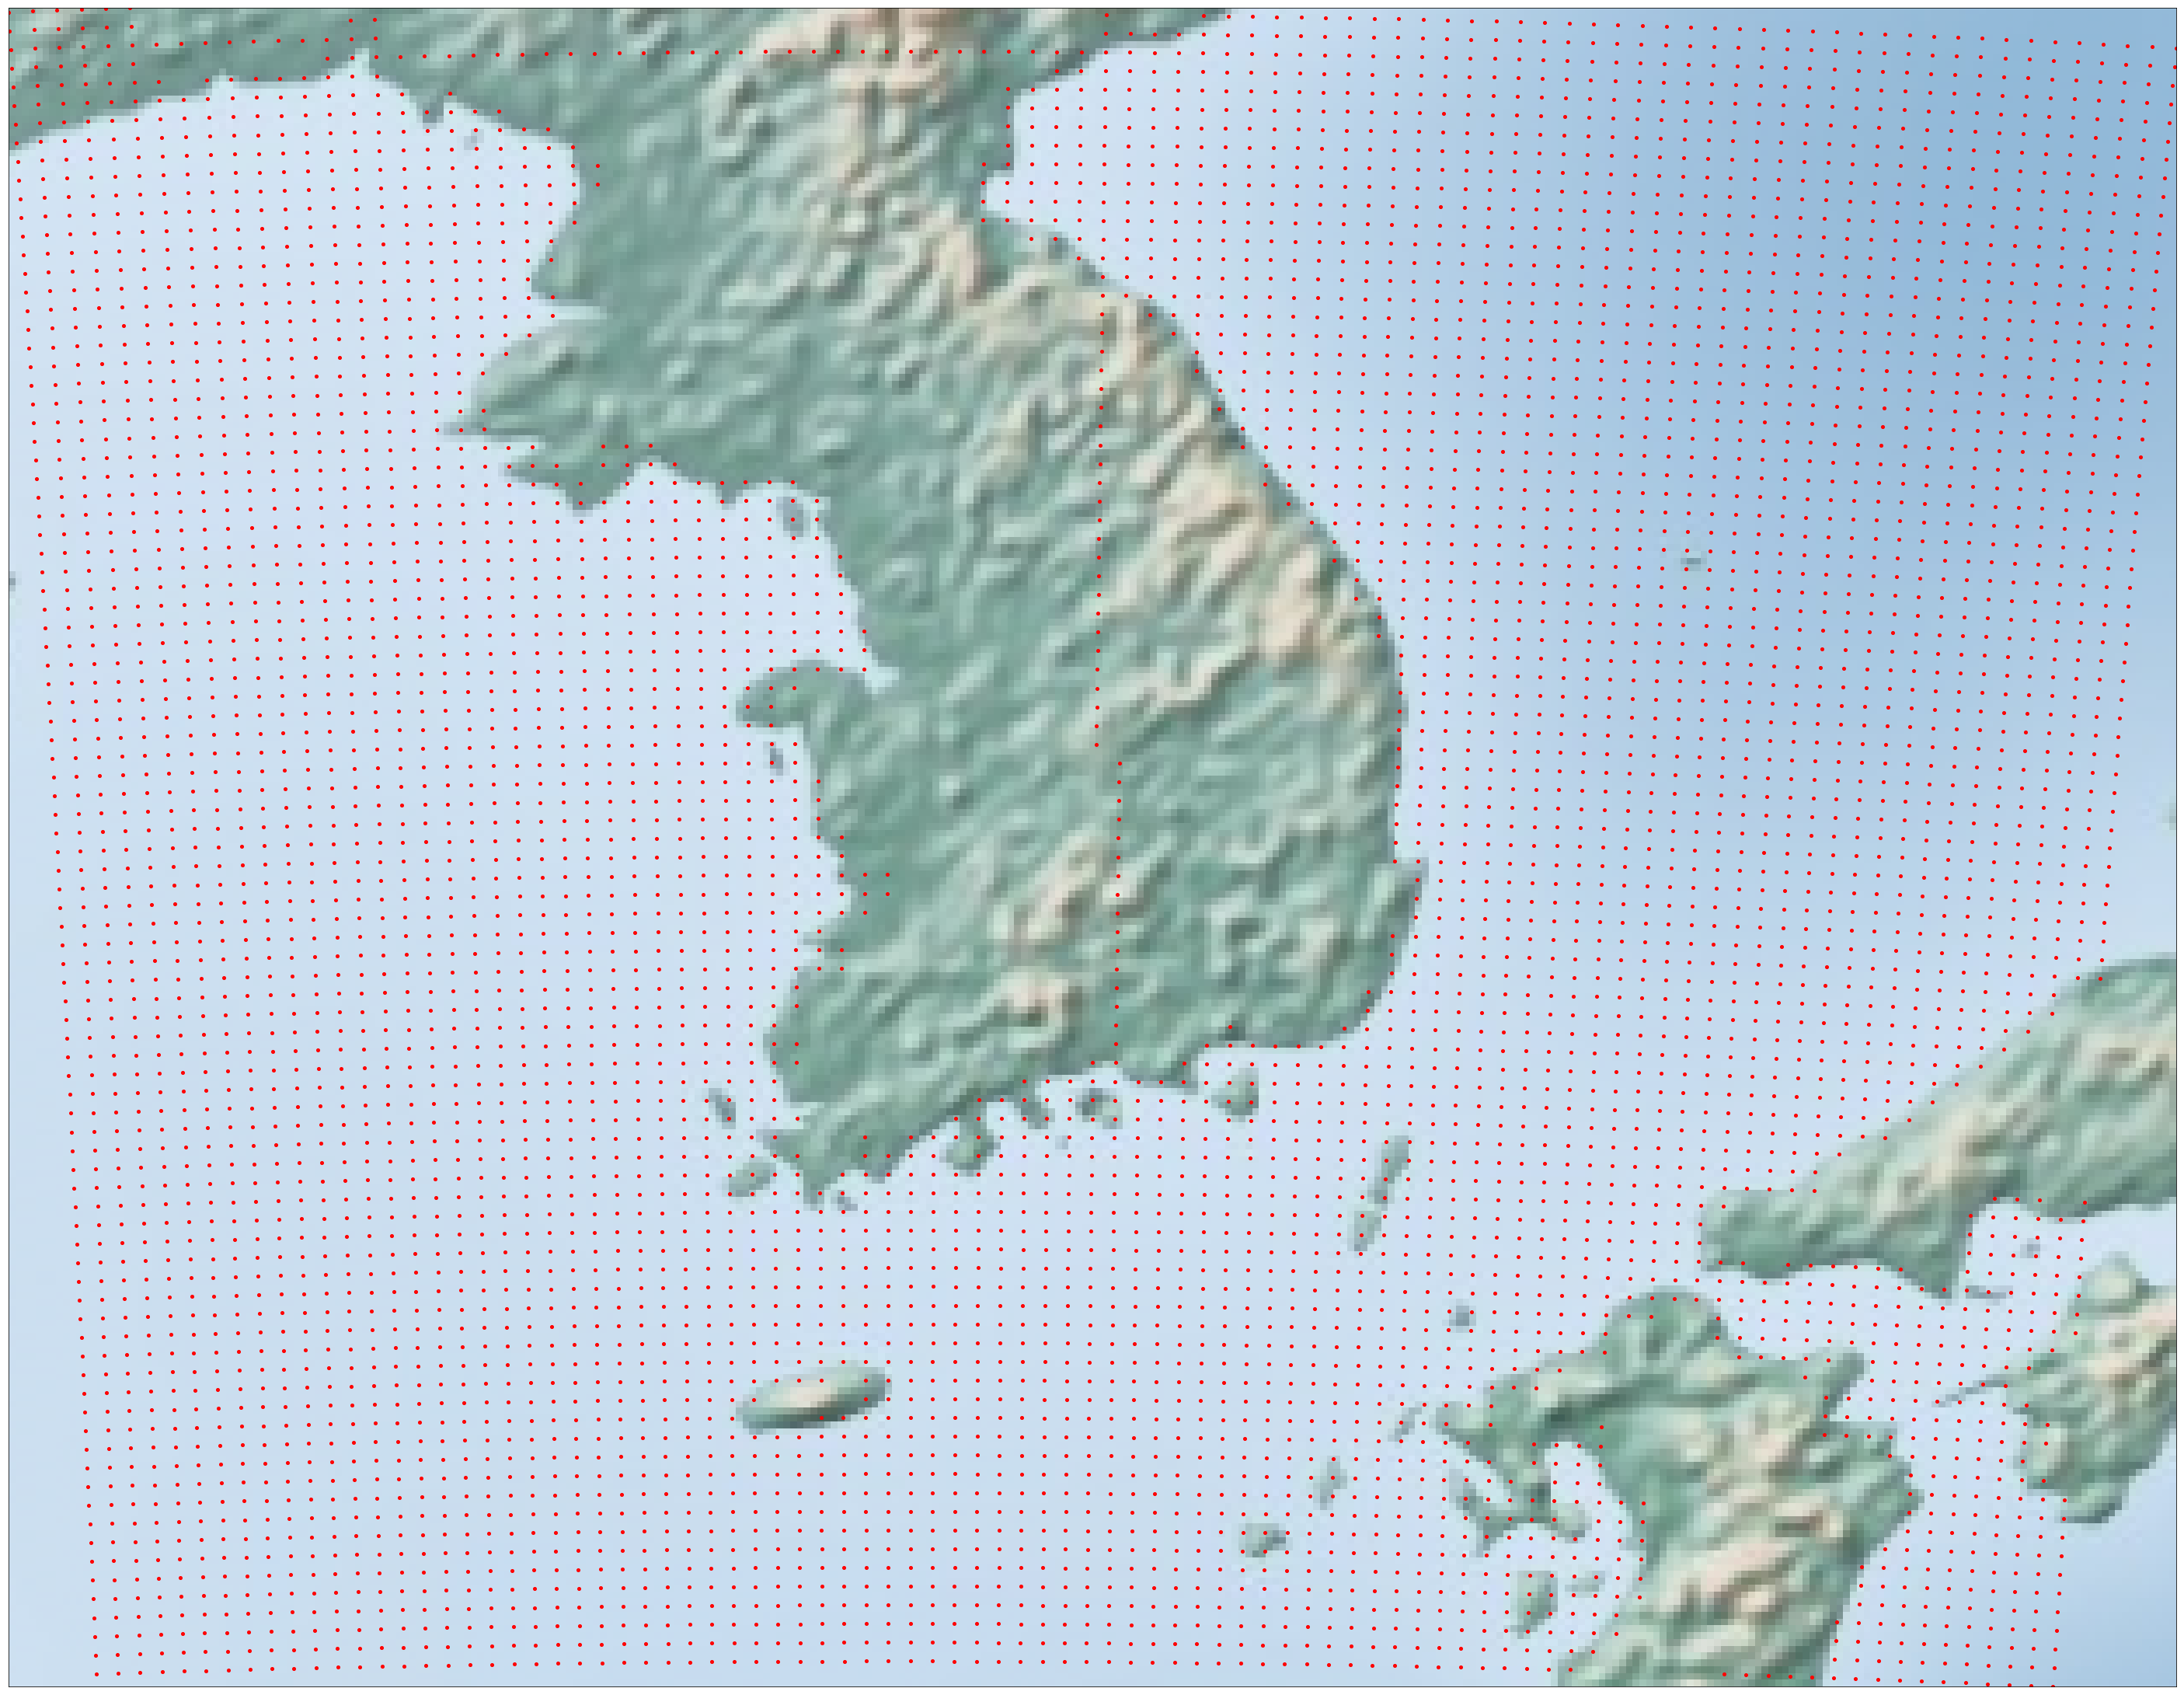

In [3]:
sea_graph = pd.read_csv('data/models/10km_model.csv')
visualize_graph(sea_graph, grid)

#### Simplified shallow water shapefile

In [ ]:
import fiona
import pyproj
from shapely.geometry import shape
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from shapely.geometry import Point

shallow_water = MultiPolygon([shape(pol['geometry']) for pol in fiona.open('data/shapes/shallow_water.shp')])

shallow_water

In [ ]:
%time print(shallow_water.contains(Point(30, 53)))
%time print(shallow_water.contains(Point(21.0605423,60.2115326)))

In [ ]:
nodes = set(sea_graph.original.drop_duplicates().values)

shallow_nodes = []

for node in nodes:
    latlon = grid.extract_coords_lat_lon(node)
    p = Point((latlon[1], latlon[0]))
    if shallow_water.contains(p):
        shallow_nodes.append(node)

len(shallow_nodes)

In [ ]:
shallow_graph = pd.DataFrame(data=shallow_nodes, columns=['original'])
visualize_graph(shallow_graph, grid)

In [ ]:
visualize_two_graphs(sea_graph, shallow_graph, grid)